<a href="https://colab.research.google.com/github/Anujpratap9997/DeepLearning/blob/main/Transfer_learning_feature_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:12<00:00, 105MB/s]
100% 1.06G/1.06G [00:12<00:00, 94.5MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten
from keras.applications.vgg16 import VGG16

In [6]:
conv_base=VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
)

58889256/58889256 [==============================] - 0s 0us/step


In [8]:
model=Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [9]:
conv_base.trainable=False

In [10]:
from keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array,load_img

In [12]:
#Data Augmentation
batch_size=32

train_datagen=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
    '/content/train',
    target_size=(150,150),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    '/content/test',
    target_size=(150,150),
    batch_size=batch_size,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
history=model.fit_generator(train_generator,epochs=10,validation_data=validation_generator)

<ipython-input-14-b0cf7ca3fffe>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_generator,epochs=10,validation_data=validation_generator)


Epoch 1/10
625/625 [==============================] - 185s 278ms/step - loss: 0.3042 - accuracy: 0.8680 - val_loss: 0.2159 - val_accuracy: 0.9100
Epoch 2/10
625/625 [==============================] - 170s 271ms/step - loss: 0.2425 - accuracy: 0.8969 - val_loss: 0.2098 - val_accuracy: 0.9078
Epoch 3/10
625/625 [==============================] - 151s 242ms/step - loss: 0.2213 - accuracy: 0.9064 - val_loss: 0.1992 - val_accuracy: 0.9138
Epoch 4/10
625/625 [==============================] - 151s 241ms/step - loss: 0.2162 - accuracy: 0.9061 - val_loss: 0.2106 - val_accuracy: 0.9100
Epoch 5/10
625/625 [==============================] - 151s 242ms/step - loss: 0.1998 - accuracy: 0.9159 - val_loss: 0.2075 - val_accuracy: 0.9088
Epoch 6/10
625/625 [==============================] - 150s 240ms/step - loss: 0.1934 - accuracy: 0.9166 - val_loss: 0.2182 - val_accuracy: 0.9102
Epoch 7/10
625/625 [==============================] - 150s 240ms/step - loss: 0.1880 - accuracy: 0.9201 - val_loss: 0.1827 -

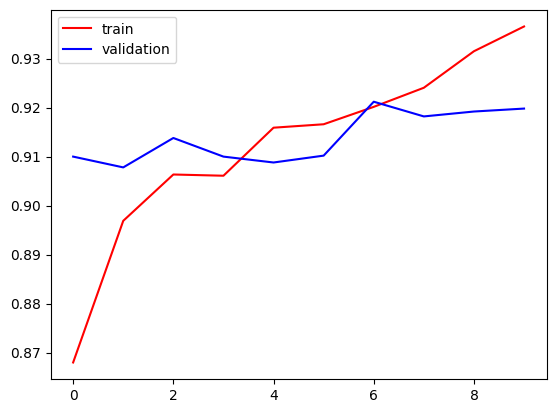

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

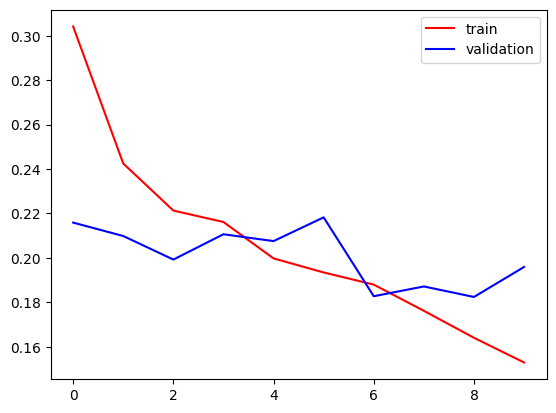

In [17]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()